# Lab 3

### Team Members:
 - Alex Lopez
 - Chris Haub
 - Erin McClure-Price
 - Chad Kwong

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import turicreate as tc
from sklearn.preprocessing import StandardScaler
import plotly.express as px #EMP used for some outlier stuff
from scipy import stats #EMP used for some outlier stuff

# Setting Random State for replicability
randomState = 777

#### Data Import

In [2]:
%%time

#Loading all data file separately 
vle = pd.read_csv('./anonymiseddata/vle.csv')
assessments = pd.read_csv('./anonymiseddata/assessments.csv')
courses = pd.read_csv('./anonymiseddata/courses.csv')
studentAssessments = pd.read_csv('./anonymiseddata/studentAssessment.csv')
studentInfo = pd.read_csv('./anonymiseddata/studentInfo.csv')
studentRegistration = pd.read_csv('./anonymiseddata/studentRegistration.csv')
studentVle = pd.read_csv('./anonymiseddata/studentVle.csv')

CPU times: user 4.57 s, sys: 697 ms, total: 5.26 s
Wall time: 5.3 s


# Business Understanding 1 #
*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?*

For Lab 3 we chose to use the "Open University Learning Analytics Dataset" (OULAD) which is an anonymized collection of information acquired from online students who were enrolled in the Open University (Milton Keynes, England) in 2013-2014. The data includes student demographic and registration information, as well as assessment results and interactions with the Virtual Learning Environment (VLE). There are multiple ways that the OULAD can be utilized, including prediction of grade results, better understanding of the factors that influence online student outcomes, or to compare online student results to in-person student results. The reason why this dataset is important is because it can be used by educators and universities to increase student success within an online learning environment. 

Our goal for Lab 3 was to explore the OULAD using K-Means clustering in order to find trends and insight into student learning styles. We chose K-Means clustering because it is an unsupervised algorithm that is straightforward to carry out, scalable, and can be used for large datasets. We chose to evaluate the clustering model using the **Dunn Index..?**, which calculates the closest distance between two clusters divided by the largest distance between two clusers. The Dunn Index has a range of 0 to 1, wherein the closer the value is to 1 the better the clustering. We felt that the Dunn Index was ideal because it provides a numeric value to the fitness of a cluster rather than through visual analysis.


##### References
[Kaggle: OULAD](https://www.kaggle.com/datasets/rocki37/open-university-learning-analytics-dataset)

[K-Means Clustering and Dunn Index Implementaion 
From Scratch]( https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)

[Dunn Index for K-Means Clustering Evaluation](https://python-bloggers.com/2022/03/dunn-index-for-k-means-clustering-evaluation/)

[A Simple Explanation of K-Means Clustering](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)

# Data Understanding 1 #
*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?*

### Data Description

The OULAD dataset is derived from a relational database schema, and contains seven CSV files that encompasses data collected from 32,593 students that were enrolled in 22 courses. There are a total of 43 variables and over **X** million instances. The CSV files and their contents are described below, information regarding each variable was taken from [HERE](https://analyse.kmi.open.ac.uk/open_dataset). It should be noted that "modules" refer to university courses and VLE refers to "virtual learning environment".

#### Courses:
* code_module **(categorical)** - code for the module, which serves as the identifier
* code_presentation  **(categorical)**– code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* length **(numeric)** - length of the module-presentation in days.

#### Assessments
* code_module **(categorical)** – identification code of the module, to which the assessment belongs.
* code_presentation **(categorical)** - identification code of the presentation, to which the assessment belongs.
* id_assessment **(numeric)** – identification number of the assessment.
* assessment_type **(categorical)** – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date **(numeric)** – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
* weight **(numeric)** - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

#### VLE
* id_site **(numeric)** – an identification number of the material.
* code_module **(categorical)** – an identification code for module.
* code_presentation **(categorical)** - the identification code of presentation.
* activity_type **(categorical)** – the role associated with the module material.
* week_from **(numeric)** – the week from which the material is planned to be used.
* week_to **(numeric)** – week until which the material is planned to be used.;

#### StudentInfo
* code_module **(categorical)** – an identification code for a module on which the student is registered.
* code_presentation **(categorical)** - the identification code of the presentation during which the student is registered on the module.
* id_student **(numeric)** – a unique identification number for the student.
* gender **(categorical)** – the student’s gender.
* region **(categorical)** – identifies the geographic region, where the student lived while taking the module-presentation.
* highest_education **(categorical)** – highest student education level on entry to the module presentation.
* imd_band **(categorical)** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band **(numeric)** – band of the student’s age.
* num_of_prev_attempts **(numeric)** – the number times the student has attempted this module.
* studied_credits **(numeric)** – the total number of credits for the modules the student is currently studying.
* disability **(categorical)**  – indicates whether the student has declared a disability.
* final_result **(categorical)** – student’s final result in the module-presentation.

#### StudentRegistragion
* code_module **(categorical)** – an identification code for a module.
* code_presentation **(categorical)** - the identification code of the presentation.
* id_student **(numeric)** – a unique identification number for the student.
* date_registration **(numeric)** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* date_unregistration **(numeric)** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

#### StudentAssessment
* id_assessment **(numeric)** – the identification number of the assessment.
* id_student **(numeric)** – a unique identification number for the student.
* date_submitted **(numeric)** – the date of student submission, measured as the number of days since the start of the module presentation.
* is_banked **(numeric)** – a status flag indicating that the assessment result has been transferred from a previous presentation.
* score **(numeric)** – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

#### StudentVLE
* code_module **(categorical)** – an identification code for a module.
* code_presentation **(categorical)** - the identification code of the module presentation.
* id_student **(numeric)** – a unique identification number for the student.
* id_site **(numeric)** - an identification number for the VLE material.
* date **(numeric)** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click **(numeric)** – the number of times a student interacts with the material in that day.



We found that using all of the 32000 students was too intensive, so we sampled 750 random students to bring down the size of the dataset

In [3]:
%%time
# Randomly sampling 4,000 records StudentVle Table with Million Rows.
studentSample = studentInfo.sample(n=750, random_state = randomState)
print(studentSample.shape)

# vle
# assessments X
# courses X
# studentAssessments X
# studentInfo X
# studentRegistration X
# studentVleSample X

df = pd.merge(studentSample, studentVle, on=['code_module', 'code_presentation', 'id_student'])
df2 = pd.merge(studentAssessments, assessments, on='id_assessment')
df = pd.merge(df, df2, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = pd.merge(df, courses, on= ['code_module', 'code_presentation'], how='left')
df = pd.merge(df, studentRegistration, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = pd.merge(df, vle, on=['id_site', 'code_module', 'code_presentation'], how='left')
print(df.shape)
df.head()

(750, 12)
(1941647, 28)
CPU times: user 4.3 s, sys: 1.04 s, total: 5.34 s
Wall time: 5.36 s


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,score,assessment_type,date_y,weight,module_presentation_length,date_registration,date_unregistration,activity_type,week_from,week_to
0,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,homepage,NaN,NaN
1,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,resource,NaN,NaN
2,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,forumng,NaN,NaN
3,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,forumng,NaN,NaN
4,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,homepage,NaN,NaN


### Missing Values

From the cell below, we saw that date_unregistration had null entries in over 96% of the data, and both week_from and week_to had null entries for over 86% of the data. Since these columns seemed to be unnecessary, we chose to drop all three as they consisted mostly of missing values. These columns could be used to analyze the population of the data that are not registered. **I don't understand this last sentence**

Running the same code on the dataset after dropping the three columns showed that the percentages of missing values in the remaining columns were less than 5%.

In [4]:
print('Missing values: \n', df.isnull().sum() * 100 / len(df),'\n\n')
df = df.drop(columns = ['week_from', 'week_to', 'date_unregistration'])
print('Missing values after dopping columns: \n', df.isnull().sum() * 100 / len(df))

Missing values: 
 code_module                    0.000000
code_presentation              0.000000
id_student                     0.000000
gender                         0.000000
region                         0.000000
highest_education              0.000000
imd_band                       6.024885
age_band                       0.000000
num_of_prev_attempts           0.000000
studied_credits                0.000000
disability                     0.000000
final_result                   0.000000
id_site                        0.000000
date_x                         0.000000
sum_click                      0.000000
id_assessment                  0.147040
date_submitted                 0.147040
is_banked                      0.147040
score                          0.193650
assessment_type                0.147040
date_y                         2.112536
weight                         0.147040
module_presentation_length     0.000000
date_registration              0.000000
date_unregistration   

From the code below, we can see that the missing values within the IMD Band variable come from the Northern Region and Ireland. The next step was to choose how best to deal with the missing values within the dataset.

In [5]:
missingIMDBand = df[df['imd_band'].isnull()]
print(missingIMDBand.region.value_counts() * 100 / len(missingIMDBand))

print('\n\ncounts per region: \n',missingIMDBand.region.value_counts(),'\n\n')
print('percentage breakdown per region: \n',missingIMDBand.region.value_counts() * 100 / len(missingIMDBand), '\n\n')

northRegionMV = missingIMDBand.region.value_counts()[0]
irelandMV = missingIMDBand.region.value_counts()[1]
southRegionMV = missingIMDBand.region.value_counts()[2]

print('North Region percent of total: ',northRegionMV/len(df.region[df.region=='North Region']))
print('Ireland percent of total: ',irelandMV/len(df.region[df.region=='Ireland']))
print('South Region percent of total: ',southRegionMV/len(df.region[df.region=='South Region']))

North Region    62.260861
Ireland         27.604247
South Region    10.134893
Name: region, dtype: float64


counts per region: 
 North Region    72834
Ireland         32292
South Region    11856
Name: region, dtype: int64 


percentage breakdown per region: 
 North Region    62.260861
Ireland         27.604247
South Region    10.134893
Name: region, dtype: float64 


North Region percent of total:  0.6317789112105756
Ireland percent of total:  0.44861838540726023
South Region percent of total:  0.0622091162380695


In [6]:
print(df.imd_band.value_counts(),"\n\n")

print(df[(df.region=='North Region') | (df.region=='Ireland')].imd_band.value_counts())

50-60%     227488
40-50%     219633
70-80%     207558
30-40%     191471
90-100%    188235
20-30%     183785
60-70%     179316
10-20      166002
0-10%      131874
80-90%     129303
Name: imd_band, dtype: int64 


0-10%     25465
60-70%    15650
30-40%    14445
10-20      9445
80-90%     7324
70-80%     5780
40-50%     2738
20-30%     1292
Name: imd_band, dtype: int64


If we were particularly interested in examining regional differences, we theorized that we could calculate the most likely IMD_band value per region and fill in the missing values to match that distribution. However since the missing values only accounted for less than 10% of the total data, we chose to drop all the rows containing missing values, as data size requirements were still more than satisfied.

In [7]:
df.dropna(inplace=True)
try:
    df.drop(columns=['id_student','id_assessment','id_site','code_module','code_presentation'],inplace=True)
except:
    print("These columns have already been dropped")

### One Hot Encoding

As shown in the code output below, many of the variables in the OULAD were categorical making it necessary to One Hot Encode the data in order to analyze it.

In [8]:
df.dtypes

gender                         object
region                         object
highest_education              object
imd_band                       object
age_band                       object
num_of_prev_attempts            int64
studied_credits                 int64
disability                     object
final_result                   object
date_x                          int64
sum_click                       int64
date_submitted                float64
is_banked                     float64
score                         float64
assessment_type                object
date_y                        float64
weight                        float64
module_presentation_length      int64
date_registration             float64
activity_type                  object
dtype: object

In [9]:
# View unique values in each column
# for col in df:
#   print(df[col].unique())

In [10]:
#Creating variables for indexing continuous and categorical variables
conCol = ['date_x', 'sum_click', 'num_of_prev_attempts', 
          'studied_credits', 'date_submitted', 'is_banked', 'score', 'date_y', 'weight']

catCol = ['gender', 'region', 'highest_education', 
          'imd_band', 'age_band', 'disability', 'final_result', 'assessment_type' ]

In [11]:
%%time
#Declaring Scalar object
scl_obj = StandardScaler()

#One hot encoding of ALL categorical variables
OneHotDF = pd.get_dummies(df[catCol],drop_first=False)

#Scaling non-encoded data
conVar = df.select_dtypes(exclude='object')
colnames = pd.Series(conVar.columns)
conVarScaled = scl_obj.fit_transform(conVar)
conVarScaled = pd.DataFrame(data = conVarScaled, columns= colnames)

#Combining with continuous variables from cleaned dataset
OneHotDF = OneHotDF.reset_index()
OneHotDF.pop('index')
OneHotDF = pd.concat([conVarScaled,OneHotDF], axis = 1)
OneHotDF.head()

#https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb


CPU times: user 1.94 s, sys: 538 ms, total: 2.48 s
Wall time: 2.48 s


,num_of_prev_attempts,studied_credits,date_x,sum_click,date_submitted,is_banked,score,date_y,weight,module_presentation_length,...,age_band_55<=,disability_N,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,-0.293024,0.985133,-1.529799,-0.352009,-1.378612,-0.061204,-0.124339,-1.549011,-0.680997,0.932829,...,0,1,0,0,0,0,1,1,0,0
1,-0.293024,0.985133,-1.529799,-0.352009,-1.378612,-0.061204,-0.124339,-1.549011,-0.680997,0.932829,...,0,1,0,0,0,0,1,1,0,0
2,-0.293024,0.985133,-1.294156,-0.352009,-1.378612,-0.061204,-0.124339,-1.549011,-0.680997,0.932829,...,0,1,0,0,0,0,1,1,0,0
3,-0.293024,0.985133,-1.294156,-0.227136,-1.378612,-0.061204,-0.124339,-1.549011,-0.680997,0.932829,...,0,1,0,0,0,0,1,1,0,0
4,-0.293024,0.985133,-1.294156,0.272359,-1.378612,-0.061204,-0.124339,-1.549011,-0.680997,0.932829,...,0,1,0,0,0,0,1,1,0,0


### Outliers

Once the OULAD was entirely numeric, we could look through the data for outliers. 

In [12]:
Q1 = OneHotDF[conCol].quantile(0.25)
Q3 = OneHotDF[conCol].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

IQRDF = pd.DataFrame(data = {'Q1':Q1, 'Q3':Q3, 'IQR':IQR})
IQRDF.index.name = 'Variable Name'
IQRDF['lowerGate'] = Q1-1.5*IQR
IQRDF['upperGate'] = Q3+1.5*IQR
IQRDF.sort_values(by='IQR', ascending=False)

,Q1,Q3,IQR,lowerGate,upperGate
Variable Name,,,,,
date_y,-0.990630,1.039845,2.030476,-4.036344,4.085559
date_submitted,-0.934731,0.826475,1.761206,-3.576540,3.468283
date_x,-0.927600,0.813541,1.741141,-3.539311,3.425252
studied_credits,-0.570508,0.985133,1.555641,-2.903970,3.318595
weight,-0.823927,0.605371,1.429298,-2.967875,2.749318
score,-0.482434,0.770900,1.253334,-2.362436,2.650902
sum_click,-0.352009,0.022612,0.374621,-0.913941,0.584544
num_of_prev_attempts,-0.293024,-0.293024,0.000000,-0.293024,-0.293024
is_banked,-0.061204,-0.061204,0.000000,-0.061204,-0.061204


Below I am going to see how many rows are outside the range of the lower and upper gates

In [41]:
for i in range(0,len(IQRDF.index)):
    lowerCount = len((OneHotDF[OneHotDF[IQRDF.index[i]] < IQRDF.lowerGate[i]]))
    upperCount = len((OneHotDF[OneHotDF[IQRDF.index[i]] > IQRDF.upperGate[i]]))

    if ((lowerCount !=0) & (upperCount !=0)):
        print('The number of outliers outside the lower and upper gates for the '+ 
              IQRDF.index[i] + 'variable is', lowerCount + upperCount)
    else:
        print('There are no outliers for the ' + IQRDF.index[i] + ' variable.')

There are no outliers for the date_x variable.
There are no outliers for the sum_click variable.
There are no outliers for the num_of_prev_attempts variable.
There are no outliers for the studied_credits variable.
There are no outliers for the date_submitted variable.
There are no outliers for the is_banked variable.
There are no outliers for the score variable.
There are no outliers for the date_y variable.
There are no outliers for the weight variable.


according to the results above, there are no outliers of concern within our dataset

# Data Understanding 2 #
*Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.*

# Modeling and Evaluation 1 #
*Train and adjust parameters*

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

y = OneHotDF['final_result_Pass']
X = OneHotDF[['num_of_prev_attempts','studied_credits','disability_N']]
cv = StratifiedKFold(n_splits=10)
# run at n =100
clf = RandomForestClassifier(n_estimators=2,random_state= randomState)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  60.48476251134443 +- 5.2136668618796085


The following cell runs a K Means clustering model using the **Number of Previous Attempts** and the **Final Result** variables

In [15]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Creating list of variables to create clusters with
clusterVars = ['num_of_prev_attempts', 'final_result_Pass']

X1 = OneHotDF[clusterVars]
#X1 = OneHotDF
nClusters = 4
cls = KMeans(n_clusters=nClusters, init='k-means++',random_state=randomState)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

# y = OneHotDF['Survived']
# X = OneHotDF[['Age','IsMale','Parch','SibSp']]
# X = np.column_stack((X,pd.get_dummies(newfeature)))
# acc = cross_val_score(cls,X,y=y,cv=cv)
# print ("Average accuracy (with kmeans for class/fare)= ", acc.mean()*100, "+-", acc.std()*100)

# Modeling and Evaluation 2	#
*Evaluate and Compare*

The following cell produces value counts and visualizations of the clusters for the variables used to calculate the clusters. We can use these visualizations to verify that the clusters are calculated properly

Cluster 1
num_of_prev_attempts : 
 1    147295
2     27761
Name: num_of_prev_attempts, dtype: int64 



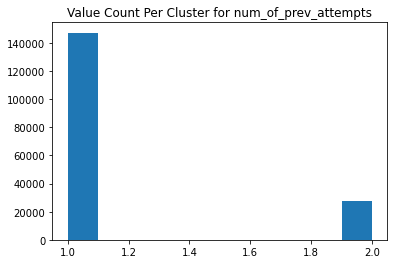

final_result : 
 Pass           93055
Fail           36720
Distinction    27896
Withdrawn      17385
Name: final_result, dtype: int64 



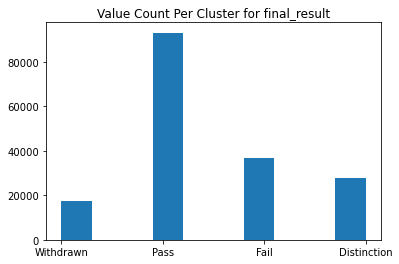





Cluster 2
num_of_prev_attempts : 
 0    952000
Name: num_of_prev_attempts, dtype: int64 



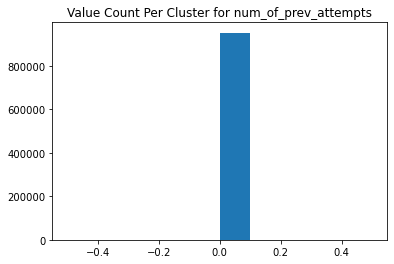

final_result : 
 Pass    952000
Name: final_result, dtype: int64 



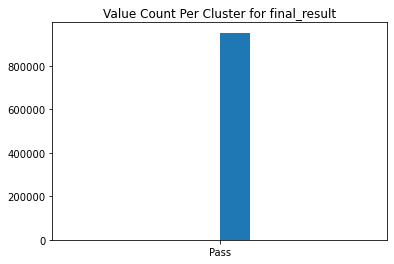





Cluster 3
num_of_prev_attempts : 
 0    646461
Name: num_of_prev_attempts, dtype: int64 



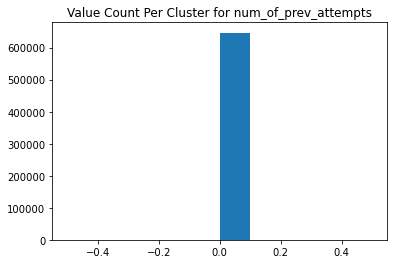

final_result : 
 Distinction    461534
Fail           124798
Withdrawn       60129
Name: final_result, dtype: int64 



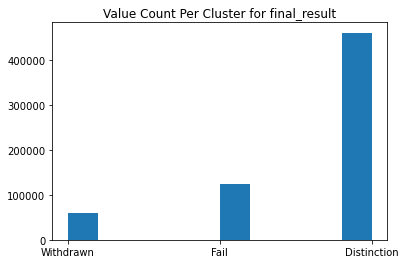





Cluster 4
num_of_prev_attempts : 
 4    10380
3      979
Name: num_of_prev_attempts, dtype: int64 



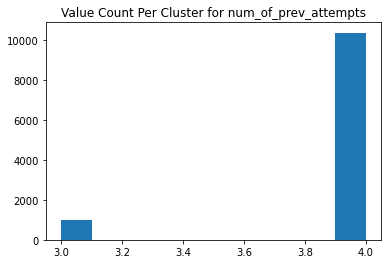

final_result : 
 Pass    10380
Fail      979
Name: final_result, dtype: int64 



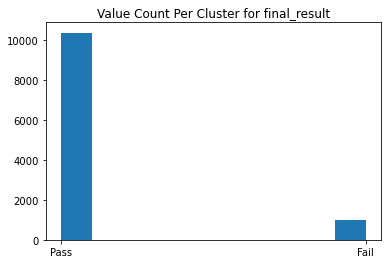

In [38]:
#Adding in cluster ID to dataframe to analyze
df2 = pd.DataFrame(df)
df2['cluster_ID'] = newfeature

# translating variables used to generate clusters to analyze clustering in initial non-OneHotEncoded dataset
checkVars = ['num_of_prev_attempts','final_result']

#For loop to iterate through clusters and generate value counts
for j in range(0,nClusters):
    dataFrame = df2[df2['cluster_ID']==j]
    print('Cluster', j + 1)
    for i in checkVars:
        # Numerical interpretation of clusters
        print(i,': \n',dataFrame[i].value_counts().sort_values(ascending=False),'\n')
        
        #Graph interpretation of clusters
        plt.hist(x = dataFrame[i].sort_values(ascending = False), label = 'cluster_ID')
        plt.title('Value Count Per Cluster for ' + i)
        plt.show()
    # Printing extra lines for visual separation between clusters
    print('\n\n\n')


# Modeling and Evaluation 3 #
*Visualize Results*

# Modeling and Evaluation 4 #
*Summarize the Ramifications*

# Deployment #
*Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*

# Exceptional Work #